In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score

In [190]:
data = pd.read_csv("loan_approval_dataset.csv")

In [191]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [192]:
data.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1839,1840,2,Not Graduate,No,5300000,13100000,14,417,4900000,6200000,18200000,6800000,Rejected
1637,1638,3,Graduate,No,4500000,12500000,12,469,4100000,7600000,14200000,3400000,Rejected
1062,1063,3,Not Graduate,Yes,600000,1400000,16,509,600000,300000,2400000,900000,Rejected
2622,2623,3,Graduate,No,3700000,9000000,6,483,9300000,400000,9900000,3600000,Rejected
609,610,4,Not Graduate,No,8300000,17900000,20,846,12700000,1300000,26800000,12200000,Approved
1511,1512,3,Graduate,Yes,3400000,7200000,12,733,4800000,2700000,8100000,2200000,Approved
3133,3134,4,Graduate,No,700000,2300000,16,688,1500000,300000,1900000,400000,Approved
2366,2367,4,Graduate,Yes,3900000,13300000,20,453,9800000,500000,12300000,4700000,Rejected
2411,2412,5,Not Graduate,No,3000000,8900000,20,886,2600000,1000000,10600000,2800000,Approved
3906,3907,2,Graduate,Yes,6200000,23800000,4,489,2900000,7500000,21300000,3300000,Approved


In [193]:
data.shape

(4269, 13)

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [195]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [196]:
data.duplicated().sum()

np.int64(0)

In [197]:
data.drop(['loan_id'], axis=1, inplace=True)

In [198]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [199]:
data.rename(columns={' no_of_dependents': 'no_of_dependents', ' education': 'education', ' self_employed': 'self_employed', ' income_annum': 'income_annum', 
                     ' loan_amount': 'loan_amount', ' loan_term': 'loan_tenure', ' cibil_score': 'cibil_score', ' residential_assets_value': 'residential_assets_value',
                     ' commercial_assets_value': 'commercial_assets_value', ' luxury_assets_value': 'luxury_assets_value', ' bank_asset_value': 'bank_asset_value',
                     ' loan_status': 'loan_status'}, inplace=True)

In [200]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_tenure', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [201]:
data['no_of_dependents'].value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

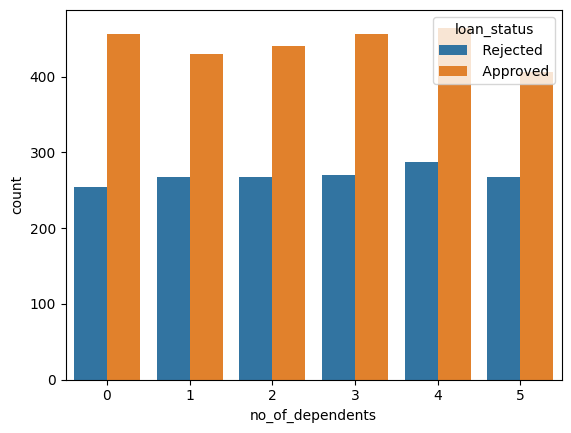

In [202]:
sns.countplot(data=data, x='no_of_dependents', hue='loan_status')

plt.show()

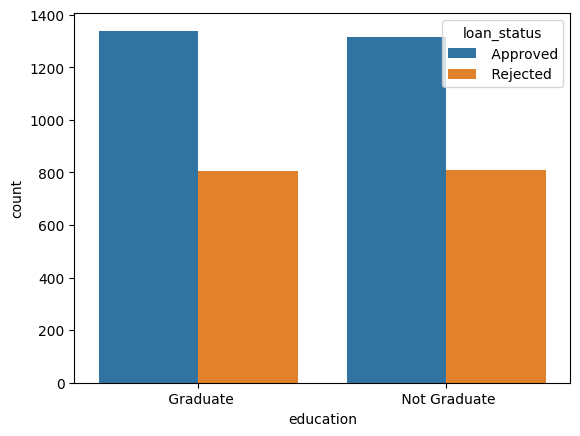

In [203]:
sns.countplot(data=data, x='education', hue='loan_status')

plt.show()

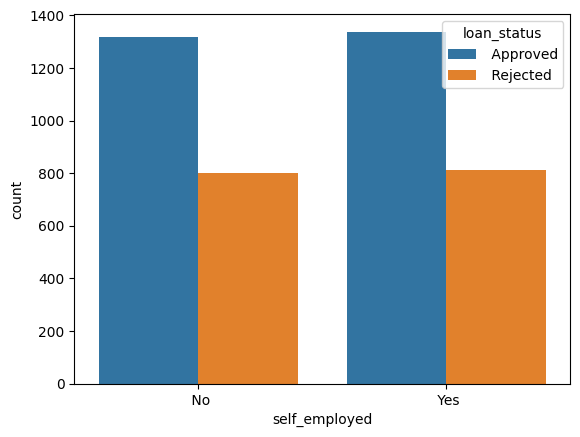

In [204]:
sns.countplot(data=data, x='self_employed', hue='loan_status')

plt.show()

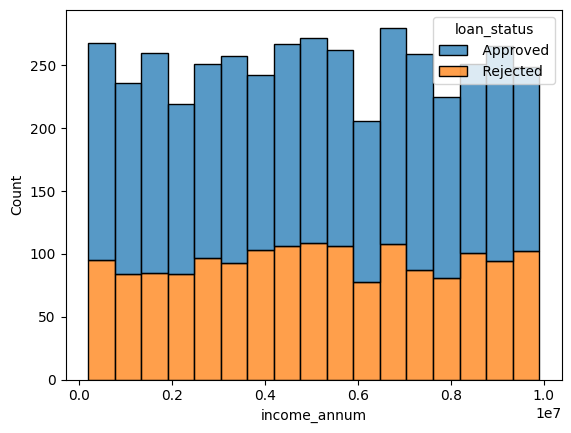

In [205]:
sns.histplot(data, x='income_annum', hue='loan_status', multiple='stack')

plt.show()

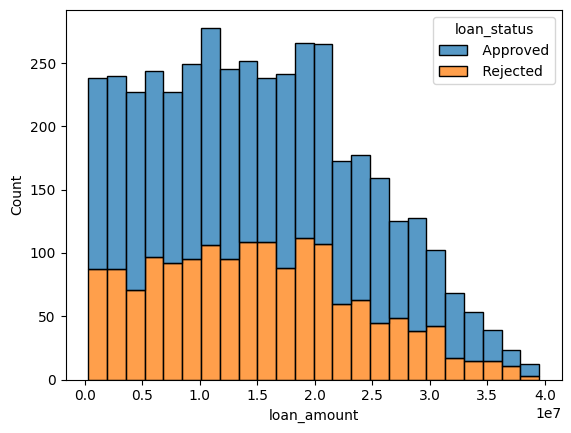

In [206]:
sns.histplot(data, x='loan_amount', hue='loan_status', multiple='stack')

plt.show()

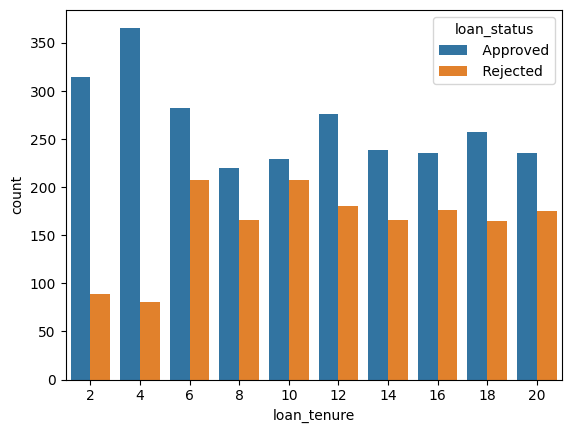

In [207]:
sns.countplot(data, x='loan_tenure', hue='loan_status')

plt.show()

Result :

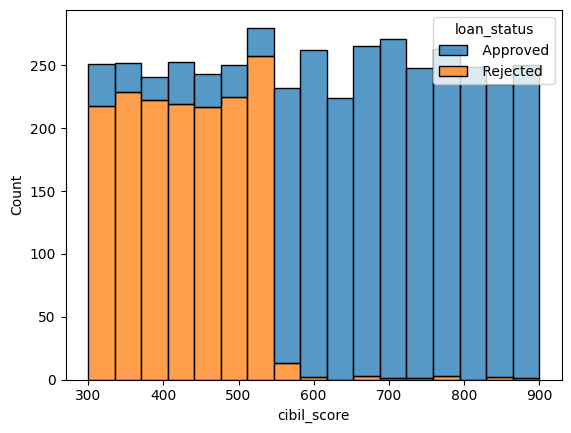

In [208]:
sns.histplot(data, x='cibil_score', hue='loan_status', multiple='stack')

plt.show()

Result :

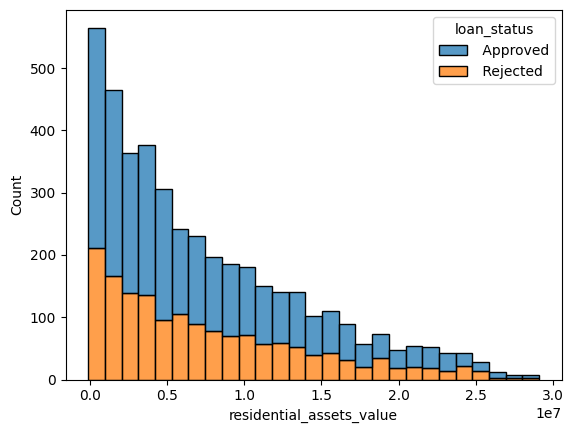

In [209]:
sns.histplot(data, x='residential_assets_value', hue='loan_status', multiple='stack')

plt.show()

Result :

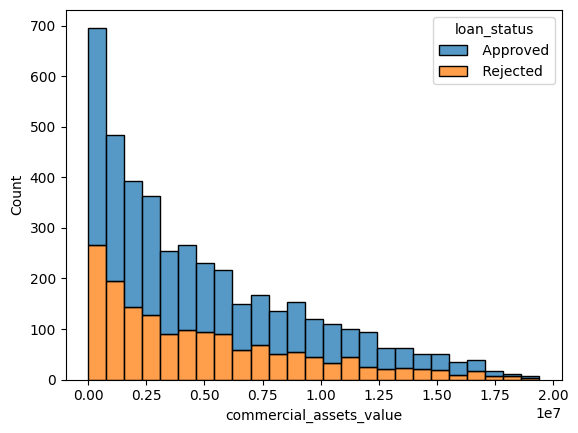

In [210]:
sns.histplot(data, x='commercial_assets_value', hue='loan_status', multiple='stack')

plt.show()

Result :

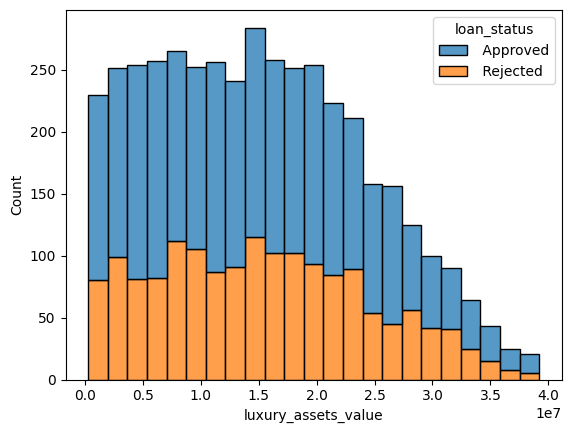

In [211]:
sns.histplot(data, x='luxury_assets_value', hue='loan_status', multiple='stack')

plt.show()

Result :

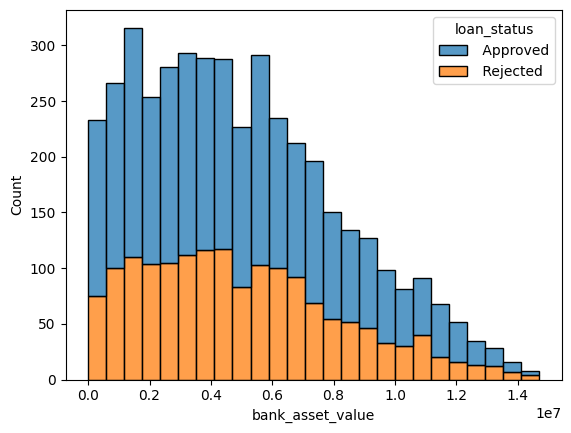

In [212]:
sns.histplot(data, x='bank_asset_value', hue='loan_status', multiple='stack')

plt.show()

Result :

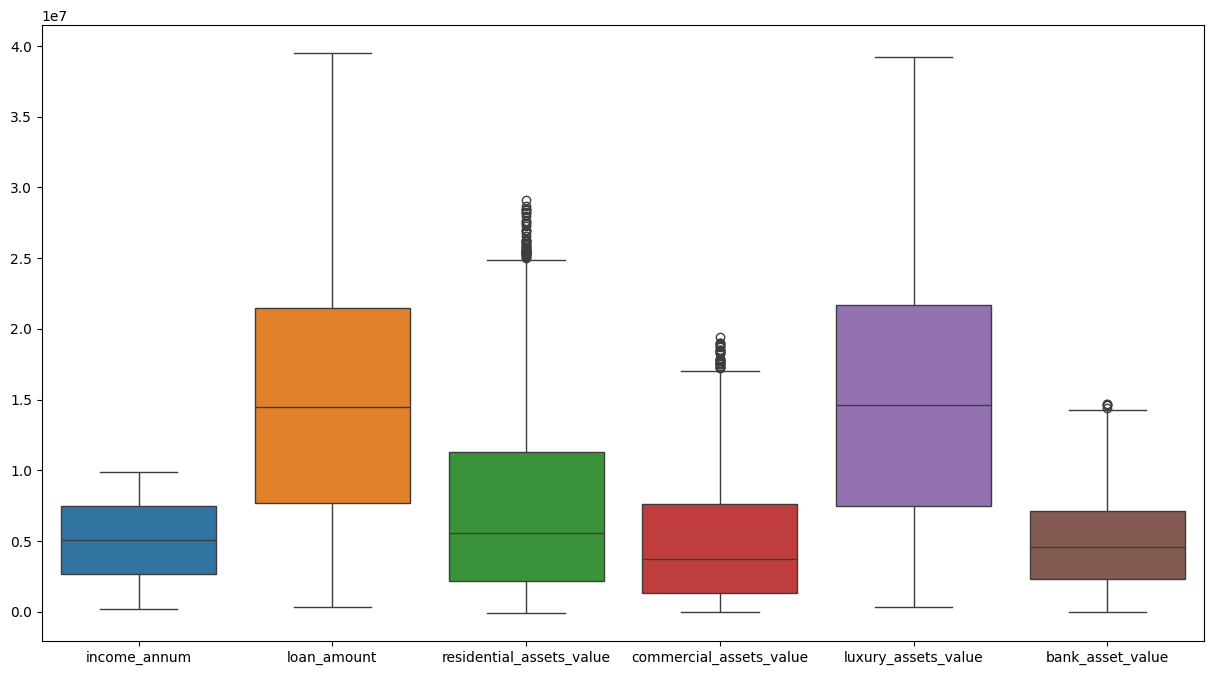

In [213]:
plt.figure(figsize=(15, 8))
sns.boxplot(data.drop(['no_of_dependents', 'loan_tenure', 'cibil_score'], axis=1))

plt.show()

In [214]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_tenure,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [215]:
data = pd.get_dummies(data, columns=['education', 'self_employed'], dtype=np.int64)

In [216]:
data

,no_of_dependents,income_annum,loan_amount,loan_tenure,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0,1,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,0,1,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0,1,1,0


In [217]:
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])

In [218]:
data

,no_of_dependents,income_annum,loan_amount,loan_tenure,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,0,1,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0,1,1,0


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_tenure               4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   commercial_assets_value   4269 non-null   int64
 7   luxury_assets_value       4269 non-null   int64
 8   bank_asset_value          4269 non-null   int64
 9   loan_status               4269 non-null   int64
 10  education_ Graduate       4269 non-null   int64
 11  education_ Not Graduate   4269 non-null   int64
 12  self_employed_ No         4269 non-null   int64
 13  self_employed_ Yes        4269 non-null   int64
dtypes: int64(14)
memory usage: 467.1 KB


Change to Guassian Distribution

In [220]:
columns = data.columns

robust_scaler = RobustScaler()

robust_scaler.fit(data)

data = pd.DataFrame(robust_scaler.transform(data), columns=columns)

In [221]:
data.isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_tenure                 0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
education_ Graduate         0
education_ Not Graduate     0
self_employed_ No           0
self_employed_ Yes          0
dtype: int64

In [222]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [223]:
log_classifier = LogisticRegression()

log_classifier.fit(X_train, y_train)

LogisticRegression()

In [224]:
y_pred_logistic = log_classifier.predict(X_test)

In [225]:
accuracy_score(y_test, y_pred_logistic)

0.905152224824356

In [230]:
confusion_matrix(y_test, y_pred_logistic)

array([[487,  34],
       [ 47, 286]])

In [236]:
precision_score(y_test, y_pred_logistic)

np.float64(0.89375)